<a href="https://colab.research.google.com/github/jiyoon56/sgiz/blob/main/CNC%EC%9E%A5%EB%B9%84%EC%84%A4%EB%B9%84_%EC%9D%B4%EC%83%81_%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**데이터 정의**
- CNC 장비 설비 이상 데이터

     * 전력 : 설비 n초 전력 데이터(단위 : W)  

     * 이상유무 : 설비 이상 데이터(0=정상, 1=이상)

본 데이터는 CNC 장비 실제 데이터를 기반으로 만들어진 샘플용 데이터


#**분석 목적**
CNC 장비 설비 이상 데이터를 바탕으로 설치된 센서 데이터를 확인하여 정상과 이상의 구분점을 찾는 것

#**1. 라이브러리 불러오기**

In [1]:
# 데이터 전처리를 위한 lib.

import pandas as pd # 가장 기본적인 데이터분석lib, DF을 활용하여 다양한 분석 可
import numpy as np # 파이썬 기반 수치 해석 lib, 수학&과학 연산 可
import sys # 파이썬 인터프리터가 제공하는 변수와 함수를 직접 제어 可
import pickle # 텍스트 상태이지만 데이터가 아닌 파이썬 객체 자체를 파일로 저장 可

In [2]:
# 데이터 시각화를 위한 lib.

'''
matplotlib == 데이터 시각화와 2D 그래프 플롯에 사용되는 파이썬 lib로, 
판다스와 연계해 시각화 기능을 제공. 명령어 스타일로 동작.
matplotlib.pyplot은 matplotlib의 모듈 중 하나로,
자동적으로 figure과 axes를 생성하는 등 사용환경 인터페이스 제공.
한글 폰트를 지원하지 않아 추가적으로 모듈 import 필요함.
'''
import seaborn as sns # 통계 그래프를 제공하는 고급 인터페이스 lib.
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc

'''
matplotlib 한글 폰트 오류 문제 해결을 위한 모듈.
font_manager == 한글 글꼴의 이름을 정확히 모르는 경우, 설치된 글꼴 이름을 찾기 위해 import
rc == 글꼴 설정 변경을 위해 import.
'''
print('\n')

In [3]:
#Deep Learning 모델 구축을 위한 lib.
'''
sklearn == ML 학습을 위한 파이썬 lib.
회귀분석, 분류, 군집 등 실무에서 적용하는 다양한 ML 모형 제공.
NumPy와 SciPy가 미리 설치돼 있어야 함.(cmd에 설치하면 됨.)
'''
from sklearn import metrics  # 분류문제에 사용되는 성능 평가 명령 호출을 위한 패키지.
from sklearn.metrics import accuracy_score # 평가지표 중 정확도.
from sklearn.metrics import classification_report, confusion_matrix
'''
classification_report == 각각의 클래스를 양성(positive) 클래스로 볼 때
정밀도, 재현율, F1 점수를 각각 구하고 그 평균값으로 전체 모형의 성능 평가.

confusion_matirx == 분류 모델이 예측한 값과 레이블된 실제 값 간의 관계를 표로 나타냄.
'''
from sklearn import tree # 의사결정나무.
from sklearn.ensemble import RandomForestClassifier # 랜덤포레스트.
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀분석.

'''
데이터 모델링 전 스케일링을 위한 lib.
스케일링을 통해 다차원인 값의 비교&분석을 용이하게 하고
자료의 오버/언더플로우를 방지하며,독립변수의 공분산 행렬의 조건 수를 감소시켜
최적화 과정에서의 안정성 및 수렴 속도를 향상시킴.
'''

from sklearn.preprocessing import MinMaxScaler # 최댓값 == 1, 최솟값 ==0이 되도록 스케일링.
from sklearn.preprocessing import StandardScaler # 평균과 표준편차를 사용하는 기본 스케일.
'''
평균을 제거하고, 데이터를 단위 분산으로 조정.
이상치가 있다면 평균과 표준편차에 큰 영향을 미쳐
변환된 데이터의 확산은 매우 달라짐.(MinMaxScaler도!)

+단위 분산
다양한 수치 크기의 입력 값 중 큰 수의 값에 
신경망이 지나치게 영향을 받는 것을 방지하기 위해 분산을 1로 두는 것.
'''

from sklearn.model_selection import train_test_split # train, test data 분할을 위한 모듈.
from xgboost import XGBClassifier
'''
Boosting ; 여러 개의 약한 결정트리를 조합해 사용하는 앙상블 학습 기법 중 하나.
          약한 예측 모형들의 학습 에러에 가중치를 두고
          순차적으로 다음 학습 모델에 반영해 강한 예측 모형을 만드는 것.

+앙상블 학습법 ; 학습 알고리즘들을 따로 쓰는 경우보다
                더 좋은 예측 성능을 얻기위해 
                다수의 학습 알고리즘을 사용하는 방법.

XGBoost ; Extreme Gradient Boosting
          Gradient Boost가 대표적인 알고리즘.
          회귀와 분류 문제 모두 지원 가능.
'''

import joblib # 학습한 모델을 pickle 파일로 저장하기 위한 lib. 디스크캐싱/병렬프로그래밍에도 사용.

import warnings #경고 메시지 무시.
np.set_printoptions(threshold=sys.maxsize)
warnings.filterwarnings(action='ignore')

      혼동행렬

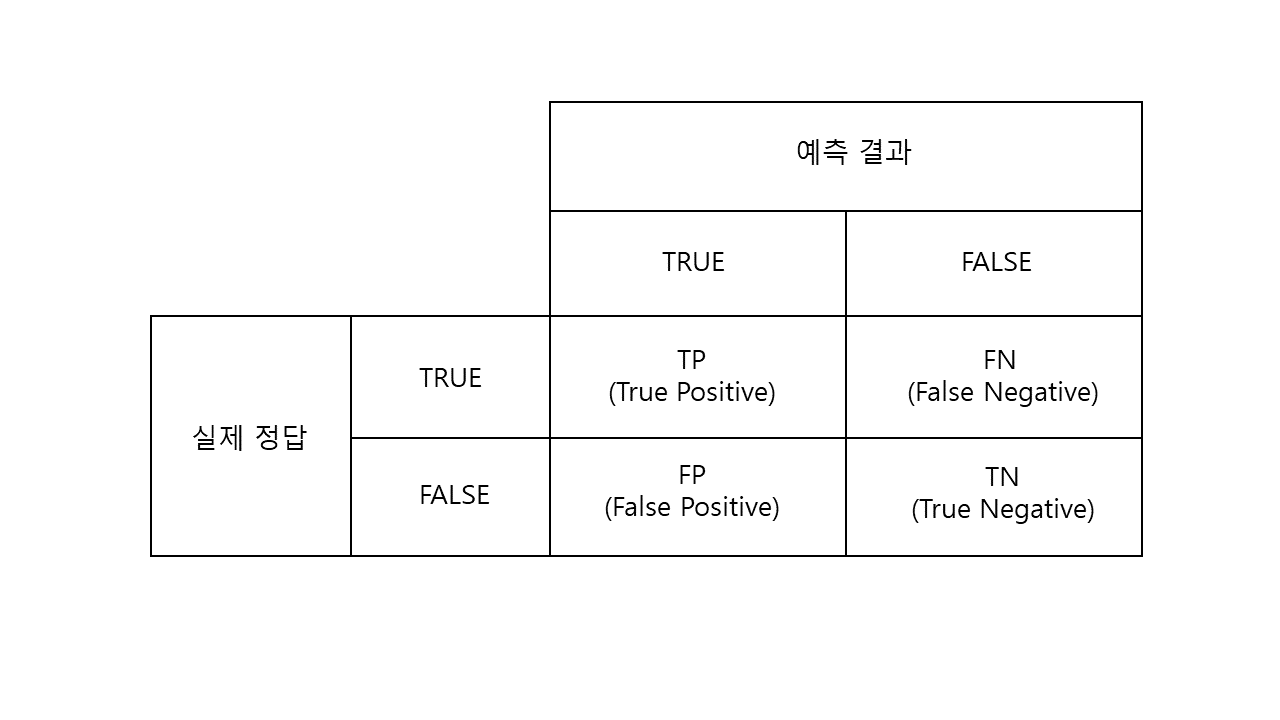

#**2. Dataset 불러오기**

In [4]:
with open(r"CNC 전력데이터.pickle", "rb") as file :
  data=pickle.load(file)

##**2.1 Dataset 확인**

        <원본Data 설명>

* 전력 : 설비 n초 전력 데이터(단위 : W)
* 이상유무 : 설비 이상 데이터(0 == 정상, 1 == 이상)

In [5]:
data

,전력,이상유무
0,"[[941.6], [936.5], [945.8], [943.5], [943.4], ...",0
1,"[[1213.5907758279886], [895.6825214985843], [8...",0
2,"[[1655.369605158024], [482.32373237111756], [9...",0
3,"[[834.3210897281627], [1348.5836322439784], [8...",0
4,"[[782.6570893584785], [957.8441142157403], [66...",0
...,...,...
72,"[[525.5982213140919], [791.1392589308402], [76...",0
73,"[[980.4087117104609], [652.8741639559621], [68...",0
74,"[[740.8821917023505], [1237.6363979493733], [6...",0
75,"[[606.5935531127286], [837.317578919659], [104...",0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전력      77 non-null     object
 1   이상유무    77 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


#**3. Data 전처리**

In [7]:
#이상유무 == 0(정상데이터)인 데이터를 'normal' 변수에 할당.

normal = data[data['이상유무']==0]
normal

,전력,이상유무
0,"[[941.6], [936.5], [945.8], [943.5], [943.4], ...",0
1,"[[1213.5907758279886], [895.6825214985843], [8...",0
2,"[[1655.369605158024], [482.32373237111756], [9...",0
3,"[[834.3210897281627], [1348.5836322439784], [8...",0
4,"[[782.6570893584785], [957.8441142157403], [66...",0
...,...,...
72,"[[525.5982213140919], [791.1392589308402], [76...",0
73,"[[980.4087117104609], [652.8741639559621], [68...",0
74,"[[740.8821917023505], [1237.6363979493733], [6...",0
75,"[[606.5935531127286], [837.317578919659], [104...",0


In [8]:
#정상데이터 개수 확인.

print("정상데이터 개수 : ", len(normal))

정상데이터 개수 :  66


In [9]:
#동일한 방식으로 이상데이터도 새로운 변수(error)에 할당.

error = data[data['이상유무']==1]
error

,전력,이상유무
33,"[[992.8], [1000.6], [998.9], [1004.9], [1006.5...",1
34,"[[967.6484823056769], [992.5058062529156], [11...",1
35,"[[1366.9396228913834], [986.7802009299207], [1...",1
36,"[[874.3131191181845], [755.2941176677846], [11...",1
37,"[[941.050256908186], [1190.1426657679526], [12...",1
38,"[[800.5866261209226], [1137.4610230715468], [8...",1
39,"[[1239.4733219423133], [797.8270109165439], [1...",1
40,"[[927.2770056804436], [1199.4925074397459], [1...",1
41,"[[912.573158836126], [978.1136255473839], [120...",1
42,"[[729.3672120934598], [871.0925333694704], [93...",1


In [10]:
#이상데이터 개수 확인.
print("이상데이터 개수 : ", len(error))

이상데이터 개수 :  11


##**3.1 데이터 시각화**

In [64]:
#font_path="C:/Windows/Fonts/NGULIM.TTF"
#font_name = font_manager.FontProperties(fname=font_path).get_name()
#rc('font',family=font_name)

In [11]:
#한글 폰트 정상 출력을 위한 처리.
#셀 실행하고 '런타임 다시 시작' 후 다시 실행.

%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


  *또는, 밑의 코드를 세 개의 셀에서 실행.*

    # 단계 1: 폰트 설치
    import matplotlib.font_manager as fm

    !apt-get -qq -y install fonts-nanum > /dev/null
    fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
    font = fm.FontProperties(fname=fontpath, size=9)
    fm._rebuild()


    # 단계 2: 런타임 재시작
    import os
    os.kill(os.getpid(), 9)


    # 단계 3: 한글 폰트 설정
    import matplotlib.pyplot as plt
    import matplotlib as mpl
    import matplotlib.font_manager as fm

    # 마이너스 표시 문제
    mpl.rcParams['axes.unicode_minus'] = False
      
    # 한글 폰트 설정
    path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
    font_name = fm.FontProperties(fname=path, size=18).get_name()
    plt.rc('font', family=font_name)
    fm._rebuild()

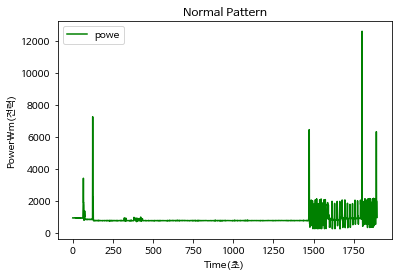

In [12]:
#정상전력데이터 시각화.

plt.plot(normal['전력'].iloc[0], 'green', label = 'powe') # iloc[] ; 데이터프레임의 행이나 컬럼에 인덱스 값으로 접근.
plt.xlabel("Time(초)") # x축 레이블 지정
plt.ylabel("Power\m(전력)") # y축 레이블 지정
plt.title('Normal Pattern')
plt.legend() #그래프에 범례(여기서는 'powe') 표시를 위한 명령어.
'''
plot()함수에서 label 문자열을 지정하고, 
legend()함수를 호출하면 되고, 위치 지정은 loc 파라미터로 가능.
'''
plt.show()

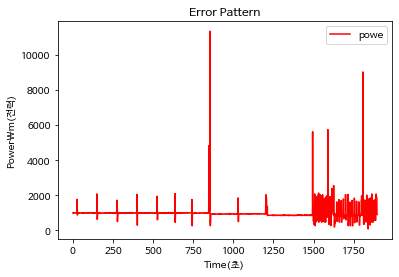

In [13]:
#이상전력데이터 시각화.

plt.plot(error['전력'].iloc[0], 'red', label = 'powe')
plt.xlabel("Time(초)") # x축 레이블 지정
plt.ylabel("Power\m(전력)") # y축 레이블 지정
plt.title('Error Pattern')
plt.legend()
plt.show()

In [14]:
#행별 길이 확인.
#why? 모델링할 때 데이터의 길이가 동일해야 함.

data_length = []

for i in range(len(normal)) : 
  powe_length = len(normal['전력'].iloc[i]) # 결과 ; 모두 1897개임.
  data_length.append(powe_length)

normal['데이터 길이'] = data_length # 새로운 열에 할당.

In [15]:
# 데이터 길이의 종류 파악(집합 함수를 사용해 중복된 값 제거)

print('데이터 길이 종류 : ', set(normal['데이터 길이']))

데이터 길이 종류 :  {1897}


        데이터 길이의 종류는 1897 한 종류임.
        즉, 전력 데이터의 길이가 모두 1897로
        1897초의 데이터임을 알 수 있음.

##**3.2 Train Data Set 만들기**

        keras를 이용한 딥러닝.
        pandas series 형태인 전력데이터를 array 형태로 치환.

In [16]:
X = np.array(data['전력'].iloc[0]) # 독립변수 X.
X.shape

(1897, 1)

In [17]:
for i in range(1, len(data)) : # 0번째는 이미 바꿨기 때문.
  X = np.concatenate((X, np.array(data['전력'].iloc[i])))

X.shape # 1897 * 77

(146069, 1)

In [18]:
X, Y = X, np.array(data['이상유무']) # 종속변수 Y.
X.shape, Y.shape

((146069, 1), (77,))

In [19]:
# 배열 및 차원 변경.
# np.reshape(변경할 배열, 차원)
''' 
.reshape(-1, 정수)인 경우,
(행 자리에 -1, 열 위치에 임의의 정수가 있는 경우)
정수에 따라 전체 원소가 해당 열 개수만큼 자동으로 구조화.

.reshape(정수, -1)인 경우,
(행 자리에 임의의 정수, 열 자리에 -1이 있는 경우),
행의 정수만큼 행이 생성돼 자동으로 구조화.
'''

X, Y = X.reshape(-1, 1897), Y.reshape(-1, 1)
X.shape, Y.shape

((77, 1897), (77, 1))

        train_x는 1897초 데이터를 하나의 label로 구성.
        데이터 구성 : 총 77 개 중 정상 66개, 이상 11개

#**4. 모델링**

##**4.1결과 지표**
    모델 결과와 실제 값의 차이 비교 지표.

* 혼동행렬(Confusion Matrix)

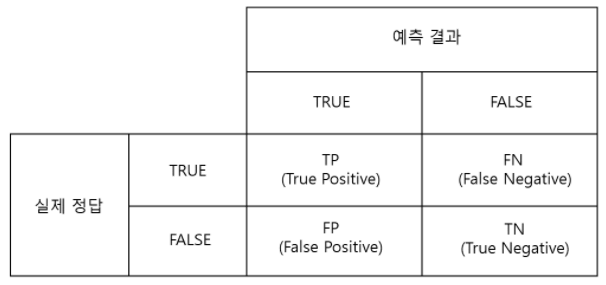

* 결정계수($R^2$)

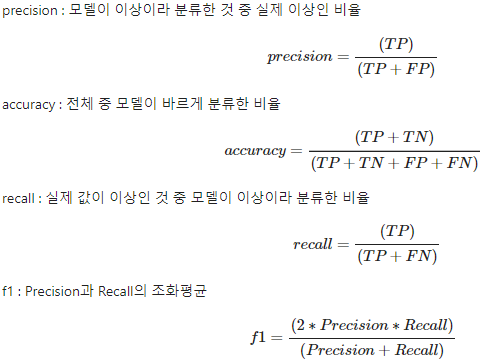

    일반적으로 결정계수의 결과 값은 훈련된 모델의 선형적 설명도를 뜻함.
    수치가 높을수록 설명력이 높다는 의미.
    목표에 따라 acc, precision, recall, f1지표의 중점이 달라짐.

##**4.2 머신러닝 모델**
    데이터를 훈련-테스트용으로 나누어 모델링.
    훈련 : 테스트 = 7 : 3

In [20]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, 
                                                    test_size = 0.3,
                                                    shuffle = True,
                                                    random_state = 1004) # 재현 가능을 위해 난수 초기값 설정

In [21]:
train_x.shape, test_x.shape

((53, 1897), (24, 1897))

In [22]:
train_y.shape, test_y.shape

((53, 1), (24, 1))

###**4.2.1 로지스틱 회귀**
    범주형데이터를 종속변수로 가진 입력데이터에 많이 활용되는 분류 기법.

In [23]:
logit = LogisticRegression() # 함수 할당

model = logit.fit(train_x, train_y) # 모델변수.fit(학습용 독립변수, 학습용 종속변수)

r_2 = logit.score(test_x, test_y) # 모델변수.score(독립변수, 종속변수)
# 여기서는 테스트용 데이터셋의 정확도 계산.

y_pred = logit.predict(test_x) # 모델변수.predict(예측하고자 하는 입력변수 데이터)

precision = metrics.precision_score(y_pred=y_pred, y_true=test_y) # 정밀도
'''
분류기가 참으로 분류한 결과 중에서 실제 참의 비율
이 예제에서는 모델이 이상이라 분류한 것 중 실제 이상인 비율.
'''

accuracy = metrics.accuracy_score(y_pred = y_pred, y_true = test_y) # 정확도
'''
모든 분류 결과 중에서 살제참-예측참 그리고 실제거짓-예측거짓'의 비율
이 예제에서는 전체 데이터를 대상으로 모델이 올바르게 분류한 비율.
'''

recall = metrics.recall_score(y_pred = y_pred, y_true = test_y) # 재현율(민감도와 동일한 값.)
'''
실제 참 중에서 분류기가 참으로 분류한 비율
이 예제에서는 실제 값이 이상인 것 중 모델이 이상이라 분류한 비율.
'''

f1 = metrics.f1_score(y_pred = y_pred, y_true = test_y)
'''
정밀도와 재현율의 조화평균으로 둘을 조합해 하나의 통계치 반환,
주로 분류 클래스 간 데이터가 심각한 불균형을 이루는 경우 사용.
조화평균 사용 이유 ; 
precision과 recall이 0 에 가까울수록 F1 score도 동일하게 낮은 값을 갖도록 하기 위해

'''

#평가지표를 한 번에 볼 수 있는 모듈.
results = metrics.classification_report(y_pred = y_pred, y_true = test_y)
'''
precision, recall, f1-score, support, accuracy, macro avg, weighted avg가 반환.
정밀도, 재현율, f1-score, 각 클래스별 데이터 개수, 정확도, 클래스별 TP-FN-FP-TN 값의 평균, 
macro avg의 확장으로 클래스별로 해당하는 data의 개수에 가주치를 주어 평균 계산.
dict형으로 반환하고 싶으면 output_dict = True 파라미터 사용하면 됨.
'''



conf_matrix = confusion_matrix(test_y, y_pred) #정확도 측정을 위한 혼동행렬 함수 호출.
#타겟의 원래 클래스와 예측한 클래스가 일치하는지를 개수로 센 결과를 표로 시각화.
# '테스트용 종속변수'와 '테스트용 독립변수로 예측한 종속변수'로 정확도 측정. 

'''
TP == 23,
FP == 0,
FN == 0,
TN == 1을 배열로 반환.
'''
print('"평가 지표 출력을 위한 과정"')

"평가 지표 출력을 위한 과정"


In [24]:
#평가 지표 출력

print("결정계수(r_2 score : ", r_2)
print("정밀도(precision) : ", precision)
print("정확도(accuracy) : ", accuracy)
print("재현율(recall) : ", recall)
print("F1 Score : ", f1)

print('\n\n')

print(results)

print('\n\n')

print('confusion_matrix\n\n', conf_matrix)

print('\n\n')

# .ravel()은 다차원 배열을 1차원 배열로 변환하는 넘파이 함수. .reshape()과 대조를 이룸.
# .flatten()함수와 비슷한데 원본 배열을 수정한다는 것에서 차이가 있음. flatten()은 복사본 만들어서 배열 변환.
tn, fp, fn, tp = confusion_matrix(test_y, y_pred).ravel()
print('TN, FP, FN, TP : ',  tn, fp, fn, fp)

결정계수(r_2 score :  1.0
정밀도(precision) :  1.0
정확도(accuracy) :  1.0
재현율(recall) :  1.0
F1 Score :  1.0



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00         1

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24




confusion_matrix

 [[23  0]
 [ 0  1]]



TN, FP, FN, TP :  23 0 0 0


###**4.2.2 의사결정나무 분류**

    의사결정나무 : 데이터를 분석해 데이터 간 존재하는 패턴을
    예측 가능한 규칙을 나무 형태와 비슷한 조합으로 나타내는 것.


**Dicision Tree Classifier()의 옵션.**

    criterion ; 분할 품질을 측정하는 기능(default ; gini)
    
    splitter ; 각 노드에서 분할을 선택할 때 사용하는 전략(default ; best)
    
    mat_depth ; 트리의 최대 깊이(값이 클수록 복잡도 증가)
    
    min_samples_split ; 자식 노드를 분할할 때 필요한 최소 샘플 수(default ; 2)
    
    min_samples_leaf ; 리프 노드에 있어야 할 최소 샘플 수(default ; 1)
    
    min_weight_fraction_leaf ; min_samples_leaf와 동일하지만 가중치가 부여된 샘플 수에서의 비율
    
    max_features ; 각 노드에서 분할에 사용할 특징의 최대 수
    
    random_state ; 난수 seed 설정
    
    max_leaf_nodes ; 리프 노드의 최대 수
    
    min_impurity_decrease ; 최소 불순도
    
    min_impurity_split ; 나무 성장을 멈추기 위한 임계치
    
    class_weight ; 각 클래스에 대한 가중치
    
    presort ; 데이터 정렬 필요 여부

In [25]:
Tree = tree.DecisionTreeClassifier(criterion = 'gini', 
                                   random_state = 1004) #criterion == 불순도 계산 옵션으로 'gini'와 'entropy'가 있음.

Tree = Tree.fit(train_x, train_y)

#-------------------------------------------------------------------------------
R_2 = Tree.score(test_x, test_y)

prediction = Tree.predict(test_x)

print('r2_score : ', R_2, '\n')

print('accuracy : ' , metrics.accuracy_score(y_pred = prediction, y_true= test_y), '\n')

print('precision : ' , metrics.precision_score(y_pred = prediction, y_true= test_y), '\n')

print('recall : ' , metrics.recall_score(y_pred = prediction, y_true= test_y), '\n')

print('f1_score : ' , metrics.f1_score(y_pred = prediction, y_true= test_y), '\n')

#-------------------------------------------------------------------------------
tree_results = metrics.classification_report(y_pred = prediction, y_true= test_y)
tree_conf_matrix = metrics.confusion_matrix(y_pred = prediction, y_true= test_y)

print('<Summary> \n  ', tree_results, '\n')
print('<Confusion_matrix> \n' , tree_conf_matrix, '\n')

#-------------------------------------------------------------------------------
tn, fp, fn, tp =metrics.confusion_matrix(y_pred=prediction,y_true=test_y).ravel()

print("TN, FP, FN, TP:",tn,fp,fn,tp) 

r2_score :  1.0 

accuracy :  1.0 

precision :  1.0 

recall :  1.0 

f1_score :  1.0 

<Summary> 
                 precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00         1

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24
 

<Confusion_matrix> 
 [[23  0]
 [ 0  1]] 

TN, FP, FN, TP: 23 0 0 1


[Text(558.0, 611.55, 'X[1507] <= 1674.357\ngini = 0.306\nsamples = 53\nvalue = [43, 10]'),
 Text(279.0, 203.85000000000002, 'gini = 0.0\nsamples = 43\nvalue = [43, 0]'),
 Text(837.0, 203.85000000000002, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]')]

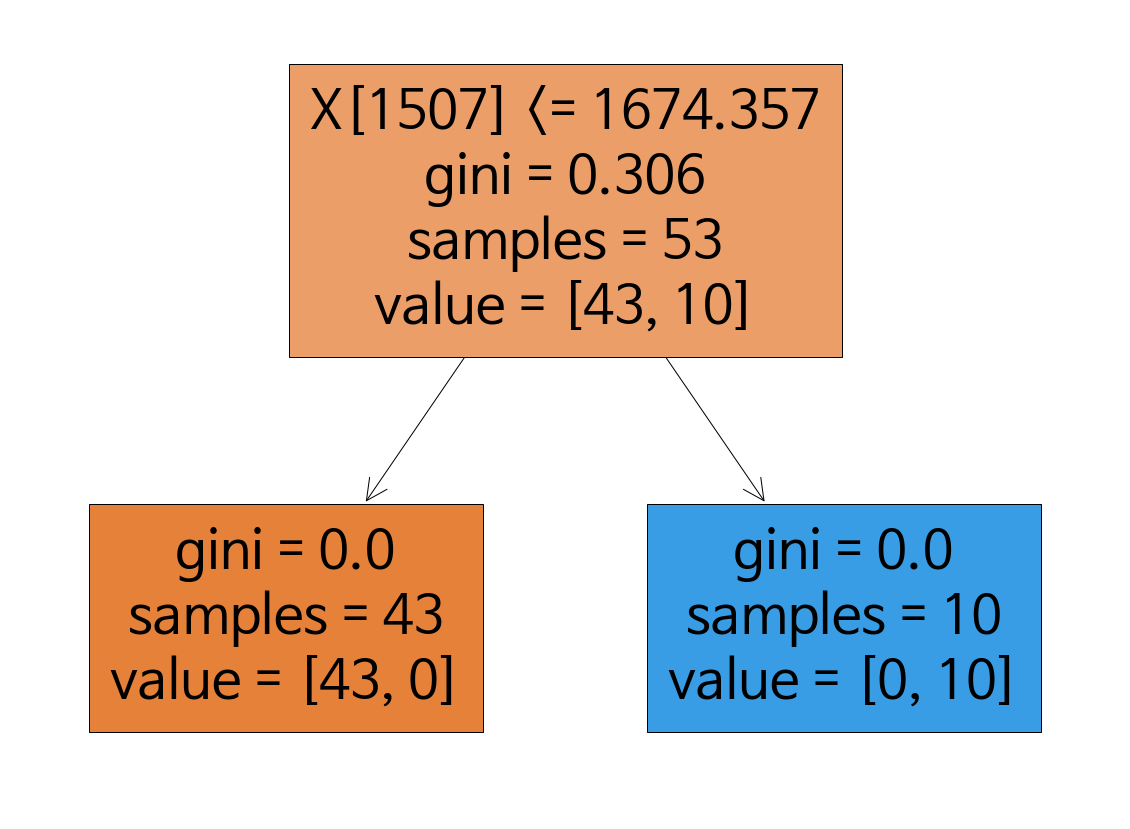

In [26]:
#의사결정나무 시각화.
plt.figure(figsize = (20,15))
tree.plot_tree(Tree,
               filled = True,
               impurity = True)

###**4.2.3 랜덤포레스트 분류**

**랜덤포레스트**
- 과적합 발생 가능성으로 의사결정나무는 일반화에 부적합한 상황이 나올 수 있음.
- 이를 보완하기 위해 항상블 모델을 채택해 만든 기법.

* 훈련 과정에서 구성한 다수의 결정 트리를 랜덤으로 학습한 뒤, 분류 및 회귀의 결과 도출에 사용.
* 다시 말해, 특정 특성을 선택하는 트리를 여러 개 생성하고, 이를 기반으로 작업 수행.
* 각각의 트리는 독립적으로 학습하기에 학습과정 병렬화 가능.
* 기본 의사결정나무에서 Tree Correlation이라 하는 특정 feature 하나가 정답에 많은 영향을 주면
* 대부분의 결과치가 비슷하게 나오는 문제점 해결.
* 파라미터의 개수가 적어 튜닝이 쉬움.
* 랜덤하게 만들어지기 때문에 random_state를 고정해야 같은 결과 도출됨.
      

**Parameters in RandomForestClassifier()**

  
    n_estimators ; 모델에서 사용할(=학습 시 생성할) 트리의 개수
    
    criterion ; 분할 품질 측정 옵션(gini, entropy)(default ; gini)
    
    max_depth ; 트리의 최대 깊이
    
    min_samples_split ; 내부 노드 분할에 필요한 최소 샘플 수(default ; 2)
    
    min_samples_leaf ; 리프 노드에 있어야 할 최소 샘플 수(default ; 1)
    
    min_weight_fraction_leaf ; min_samples_leaf와 같지만 가중치가 부여된 샘플 수에서의 비율
    
    max_features ; 각 노드에서 분할에 사용할 특징의 최대 개수
    
    max_leaf_nodes ; 리프 노드의 최대 수
    
    min_impurity_decrease ; 최소 불순도
    
    min_impurity_split ; 나무 성장을 멈추기 위한 임계치
    
    bootstrap ; 부트스트랩(중복 허용 샘플링) 사용 여부
    
    oob_score ; 일반화 정확도를 줄이기 위해 외부 샘플(부트스트랩 샘플링 시 선택되지 않은 샘플) 사용 여부

    n_jobs ; 적합성과 예측성을 위해 병렬로 실행할 작업의 수

    random_state ; 난수 seed 설정

    verbose ; 실행 과정 출력 여부

    warm_start ; 이전 호출에 사용한 solution 재사용 여부(기존 트리를 유지하고 훈련 추가 여부)

    class_weight ; 클래스에 대한 가중치들의 값





In [27]:
forest = RandomForestClassifier(n_estimators = 100, max_depth=1000, criterion = 'gini')
forest.fit(train_x, train_y)

#-------------------------------------------------------------------------------
r2 = forest.score(test_x, test_y)

y_pred_forest = forest.predict(test_x)

print('r2_score : ', r2, '\n')

print('accuracy : ' , metrics.accuracy_score(y_pred = y_pred_forest, y_true= test_y), '\n')

print('precision : ' , metrics.precision_score(y_pred = y_pred_forest, y_true= test_y), '\n')

print('recall : ' , metrics.recall_score(y_pred = y_pred_forest, y_true= test_y), '\n')

print('f1_score : ' , metrics.f1_score(y_pred = y_pred_forest, y_true= test_y), '\n')

#-------------------------------------------------------------------------------
forest_results = metrics.classification_report(y_pred = y_pred_forest, y_true= test_y)
forest_conf_matrix = metrics.confusion_matrix(y_pred = y_pred_forest, y_true= test_y)

print('<Summary> \n  ', forest_results, '\n')
print('<Confusion_matrix> \n' , forest_conf_matrix, '\n')

#-------------------------------------------------------------------------------
tn, fp, fn, tp =metrics.confusion_matrix(y_pred=y_pred_forest, y_true=test_y).ravel()

print("TN, FP, FN, TP:",tn,fp,fn,tp) 


r2_score :  1.0 

accuracy :  1.0 

precision :  1.0 

recall :  1.0 

f1_score :  1.0 

<Summary> 
                 precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00         1

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24
 

<Confusion_matrix> 
 [[23  0]
 [ 0  1]] 

TN, FP, FN, TP: 23 0 0 1


###**4.2.4 XG부스트 분류**

**XGBoost**

- 랜덤포레스트기법과 마찬가지로 앙상블 모델 기법을 채택한 분류 방법.
- 부스팅의 원리를 이용해 가중치를 갱신함.

* 뛰어난 예측 성능.
* 과적합 규제.
* Tree pruning(트리 가지치기) : 긍정 이득이 없는 분할을 가지치기해서 분할 수를 줄임.
* 자체 내장된 교차 검증을 수행해 최적화된 반복 수행 횟수를 가질 수 있음.
* 결손값을 자체적으로 처리함.

**일반 파라미터** : 부스팅 수행 시 트리를 사용할지, 선형 모델을 사용할지 등을 선택.
    
    booster ; 어떤 부스터 구조를 쓸지 결정.
    (default ; gbtree // gbtree, gblinear, dart)
    n_jobs ; XGBoost를 실행하는 데 사용되는 병렬 스레드 수.

**부스터 파라미터** : 선택한 부스터에 따라 적용하는 파라미터 달라짐.
    
    learning_rate ; 학습 비율, 0.3이 default.
    n_estimators ; 생성할 weak learner의 수, 100이 default.
                  learning_rate가 낮을 땐 이걸 높여야 과적합 방지.
    max_depth ; 트리의 최대 깊이, 6이 default.
    min_child_weight ; 관측치에 대한 가중치 합의 최소, 1이 default.
                      값이 높을수록 과적합 방지.
    gamma ; 리프노드의 추가 분할을 결정할 최소 손실 감소값.
            0이 default, 해당 값보다 손실이 크게 감소할 때 분리함.
    subsample ; weak learner가 학습에 사용할 데이터 샘플링 비율.
                1이 default, 보통 0.5 ~ 1 사용. 낮을수록 과적합 방지.
    colsample_bytree ; 각 tree별로 사용된 feature의 %.
                      1이 default, 보통 0.5 ~ 1 사용. 낮을수록 과적합 방지.
    lambda ; 가중치에 대한 L2 Regularization(Ridge, 과적합 방지) 적용 값, 1이 default.
    alpha ; 가중치에 대한 L1 Regularization(Lasso, 과적합 방지) 적용 값, 0이 default.

**학습 파라미터** : 학습 시나리오(객체함수, 평가지표 등)를 결정.
    
    objective ; 분류 방법 설정.
                회귀, 이진분류, 클래스로 반환하는 다중분류, 확률을 반환하는 다중분류.
    eval_metric ; 검증에 사용하는 함수 정의.
                  회귀분석인 경우 'rmse', 클래스 분류인 경우 'error'


In [28]:
xgb = XGBClassifier(learning_rate=0.0001, objective = 'reg:squarederror') #제곱 손실이 있는 회귀로 설정.
xgb.fit(np.array(train_x), np.array(train_y))

#-------------------------------------------------------------------------------
R2 = xgb.score(test_x, test_y)

xgb_pred = xgb.predict(np.array(test_x))

print('r2_score : ', R2, '\n')

print('accuracy : ' , metrics.accuracy_score(y_pred = xgb_pred, y_true= test_y), '\n')

print('precision : ' , metrics.precision_score(y_pred = xgb_pred, y_true= test_y), '\n')

print('recall : ' , metrics.recall_score(y_pred = xgb_pred, y_true= test_y), '\n')

print('f1_score : ' , metrics.f1_score(y_pred = xgb_pred, y_true= test_y), '\n')

#-------------------------------------------------------------------------------
xgb_results = metrics.classification_report(y_pred = xgb_pred, y_true= test_y)
xgb_conf_matrix = metrics.confusion_matrix(y_pred = xgb_pred, y_true= test_y)

print('<Summary> \n  ', xgb_results, '\n')
print('<Confusion_matrix> \n' , xgb_conf_matrix, '\n')

#-------------------------------------------------------------------------------
tn, fp, fn, tp =metrics.confusion_matrix(y_pred=xgb_pred, y_true=test_y).ravel()

print("TN, FP, FN, TP:",tn,fp,fn,tp) 

r2_score :  1.0 

accuracy :  1.0 

precision :  1.0 

recall :  1.0 

f1_score :  1.0 

<Summary> 
                 precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00         1

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24
 

<Confusion_matrix> 
 [[23  0]
 [ 0  1]] 

TN, FP, FN, TP: 23 0 0 1


##**4.3 모델 저장 및 불러 오기**

- 모델 훈련 종료 후 상황이나 조건에 부합하는 성능을 가진 모델 저장 및 호출.

In [29]:
# 모델 저장.

joblib.dump(logit, '/logit.pkl') #joblib.dump() ; 임의의 객체를 pkl 형식으로 저장.
joblib.dump(Tree, '/Tree.pkl')
joblib.dump(forest, '/forest.pkl')
joblib.dump(xgb, '/xgb.pkl')

['/xgb.pkl']

In [30]:
# 모델 불러 오기.

load_model_logit = joblib.load('/logit.pkl') # joblib.load() ; pkl 형식으로 저장된 객체 호출.
load_model_Tree = joblib.load('/Tree.pkl')
load_model_forest = joblib.load('/forest.pkl')
load_model_xgb = joblib.load('/xgb.pkl')